In [18]:
import pandas as pd, numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
plt.style.use('ggplot')

In [19]:
comments_df = pd.read_csv("video_comments_Lwx-2R9swDg_with_labels.csv", index_col=0)
comments_df['published_at'] = pd.to_datetime(comments_df['published_at'])
comments_df['date'] = comments_df['published_at'].dt.strftime('%m-%d')
comments_df['week'] = comments_df['published_at'].dt.strftime('%m-%w')
comments_df['few_shot_stance'] = comments_df['few_shot_stance'].apply(lambda x : 'FOR' if x=='FOR,' else x)

In [20]:
comments_df.head()

,id,comment,author,author_channel,like_count,published_at,coversation_id,most_prob_zsl_label,prob_zsl_label,few_shot_stance,few_shot_stance_reasons,sentiment,date,week
0,UgyZqW0x5zhxhYxWj0F4AaABAg,What will would come out with and say about th...,Shea Synott,UCq9iU_VTUeCnVKnr_vdOwXw,0,2023-05-28 23:18:11+00:00,UgyZqW0x5zhxhYxWj0F4AaABAg,anti-ukraine,[],AGAINST,This comment is against the U.S. Army as it is...,-0.9186,05-28,05-0
1,UgzN65JCJ-_xTi48zJF4AaABAg,We don't need anymore imbred Ukrainian soldier...,Shea Synott,UCq9iU_VTUeCnVKnr_vdOwXw,0,2023-05-27 07:44:16+00:00,UgzN65JCJ-_xTi48zJF4AaABAg,anti-war,"['anti-war', 'against service in the military'...",AGAINST,This comment is against the U.S. Army as it is...,0.6124,05-27,05-6
2,UgzOjmN9_qlyirQ6QCB4AaABAg,If you are dumb enough to join the military be...,Mike Stanton,UCsQQR5LeDxNgmV1Gzp9roGg,1,2023-05-26 22:40:04+00:00,UgzOjmN9_qlyirQ6QCB4AaABAg,against service in the military,['against service in the military'],AGAINST,This comment is against the U.S. Army as it is...,0.0516,05-26,05-5
3,UgzXfU7YSB65CxFeJSF4AaABAg,"""Thanks to the terrible power of our Internati...",theycallme_nightmaster,UC6QQIz9FS03tGZDUieRiRRg,2,2023-05-26 09:33:48+00:00,UgzXfU7YSB65CxFeJSF4AaABAg,antisemitic,[],AGAINST,This comment is against the U.S. Army as it is...,-0.5823,05-26,05-5
4,Ugxu-OImhl2ZP2zgWUR4AaABAg,Yooooo... Lol I went to Basic at Ft. Leonardwo...,Mr. Grown Gamer,UCidfBxbswcgs7Y1aJsjZMfQ,0,2023-05-26 05:48:29+00:00,Ugxu-OImhl2ZP2zgWUR4AaABAg,supportive of service in the army,['supportive of service in the army'],FOR,This comment is in favor of the recruiting vid...,-0.3129,05-26,05-5


In [5]:
print("number of comments: {}".format(len(comments_df)))

number of comments: 5086


In [6]:
print("number of unique authors: {}".format(len(np.unique(comments_df['author']))))

number of unique authors: 2818


In [7]:
authors, counts = np.unique(comments_df['author'], return_counts=True)
print("mean comments per user: {}".format(np.max(counts)))
print("most comments per user: {}".format(np.mean(counts)))
print("percent of users with inly one comment: {}".format(np.count_nonzero(counts == 1)/len(counts)))

mean comments per user: 67
most comments per user: 1.8048261178140526
percent of users with inly one comment: 0.7526614620298083


In [8]:
comments_df['published_at'].min()

Timestamp('2023-03-06 14:26:19+0000', tz='UTC')

In [9]:
comments_df['published_at'].max()

Timestamp('2023-05-29 14:49:20+0000', tz='UTC')

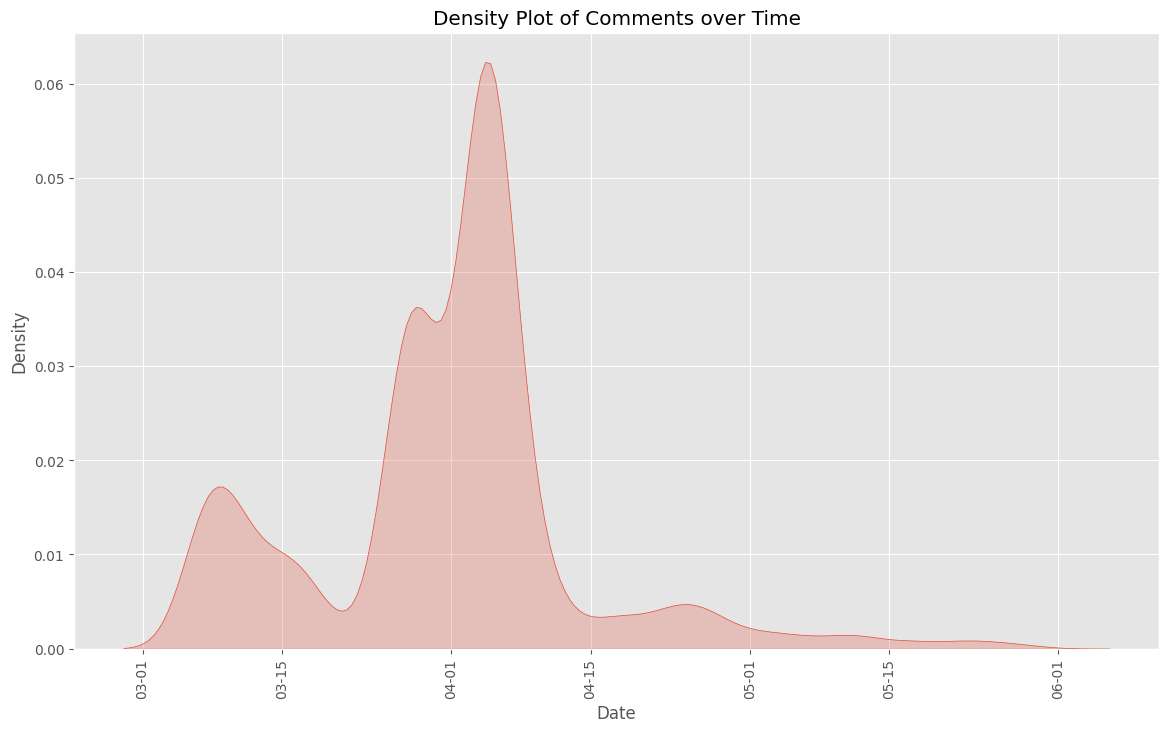

In [128]:
plt.figure(figsize=(14, 8))
sns.kdeplot(comments_df['published_at'], fill=True)

plt.xlabel('Date')
plt.ylabel('Density')
plt.title('Density Plot of Comments over Time')
date_format = mdates.DateFormatter('%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=90)

plt.show()

In [11]:
np.unique(comments_df['date'], return_counts=True)

(array(['03-06', '03-07', '03-08', '03-09', '03-10', '03-11', '03-12',
        '03-13', '03-14', '03-15', '03-16', '03-17', '03-18', '03-19',
        '03-20', '03-21', '03-22', '03-23', '03-24', '03-25', '03-26',
        '03-27', '03-28', '03-29', '03-30', '03-31', '04-01', '04-02',
        '04-03', '04-04', '04-05', '04-06', '04-07', '04-08', '04-09',
        '04-10', '04-11', '04-12', '04-13', '04-14', '04-15', '04-16',
        '04-17', '04-18', '04-19', '04-20', '04-21', '04-22', '04-23',
        '04-24', '04-25', '04-26', '04-27', '04-28', '04-29', '04-30',
        '05-01', '05-02', '05-03', '05-04', '05-05', '05-06', '05-07',
        '05-08', '05-09', '05-10', '05-11', '05-12', '05-13', '05-14',
        '05-15', '05-16', '05-17', '05-18', '05-19', '05-20', '05-21',
        '05-22', '05-23', '05-24', '05-25', '05-26', '05-27', '05-28',
        '05-29'], dtype=object),
 array([150, 146,  93,  84, 119,  42,  37,  34,  65,  57,  82,  46,  29,
          6,  10,   6,   6,   2,   9,  19,

In [12]:
comments_df = comments_df[~comments_df['few_shot_stance'].isna()]

In [13]:
np.unique(comments_df['few_shot_stance'], return_counts=True)

(array(['AGAINST', 'FOR', 'NEUTRAL'], dtype=object), array([4050,  484,  537]))

In [14]:
np.array([4050,  484,  537])/5086

array([0.79630358, 0.09516319, 0.10558396])

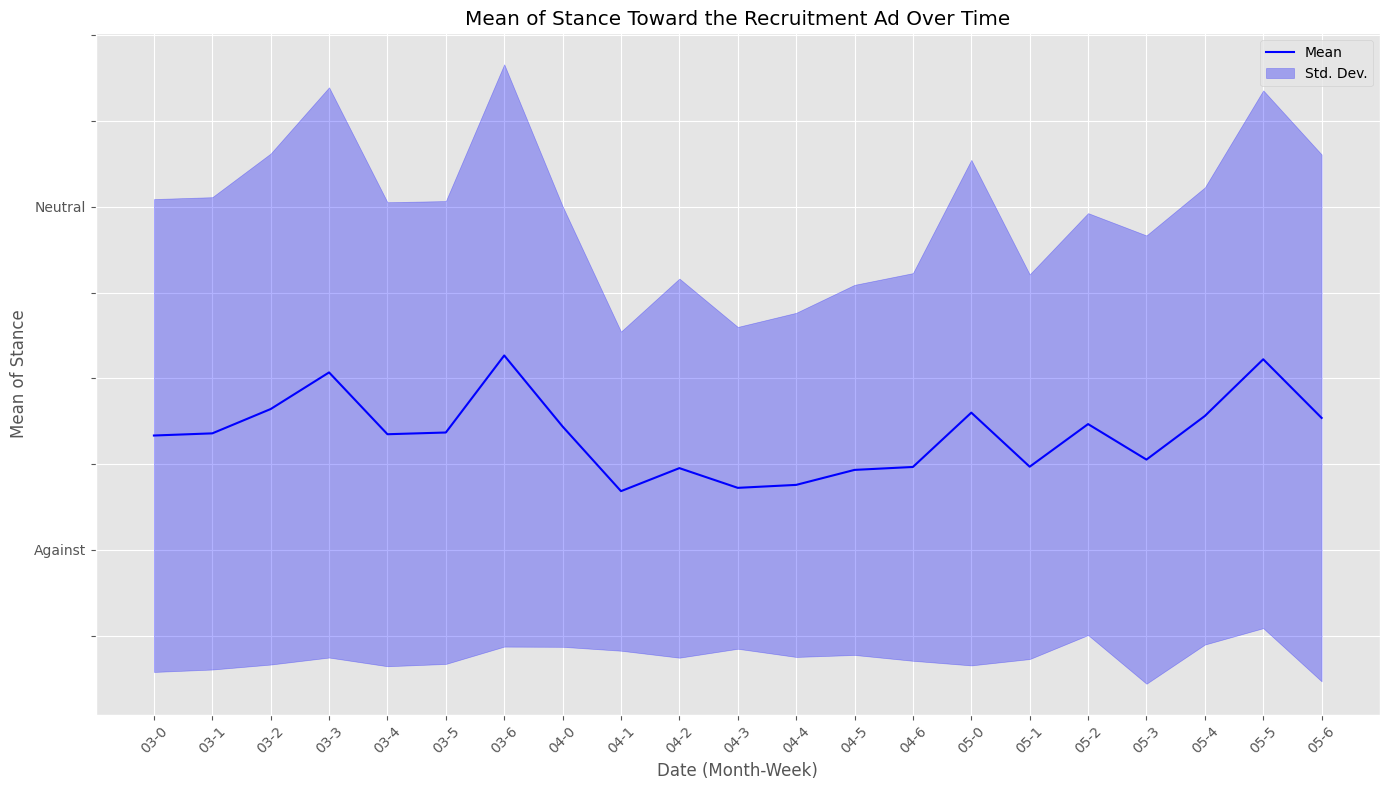

In [138]:
stance_mapping = {'FOR': 1, 'AGAINST': -1, 'NEUTRAL': 0}
comments_df['few_shot_stance_num'] = comments_df['few_shot_stance'].map(stance_mapping)

def y_label_formatter(y, pos):
    if y == 1:
        return 'For'
    elif y == -1:
        return 'Against'
    elif y == 0:
        return 'Neutral'
    else:
        return str('')

# Step 3: Group data by 'date' and calculate mean and standard deviation
grouped_data = comments_df.groupby('week')['few_shot_stance_num'].agg(['mean', 'std'])

# Step 4: Create the time line plot with shading
plt.figure(figsize=(14, 8))
plt.plot(grouped_data.index, grouped_data['mean'], label='Mean', color='blue')
plt.fill_between(grouped_data.index, grouped_data['mean'] - grouped_data['std'], 
                 grouped_data['mean'] + grouped_data['std'], alpha=0.3, color='blue', label='Std. Dev.')
plt.xlabel('Date (Month-Week)')
plt.ylabel('Mean of Stance')
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_label_formatter))
plt.title('Mean of Stance Toward the Recruitment Ad Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

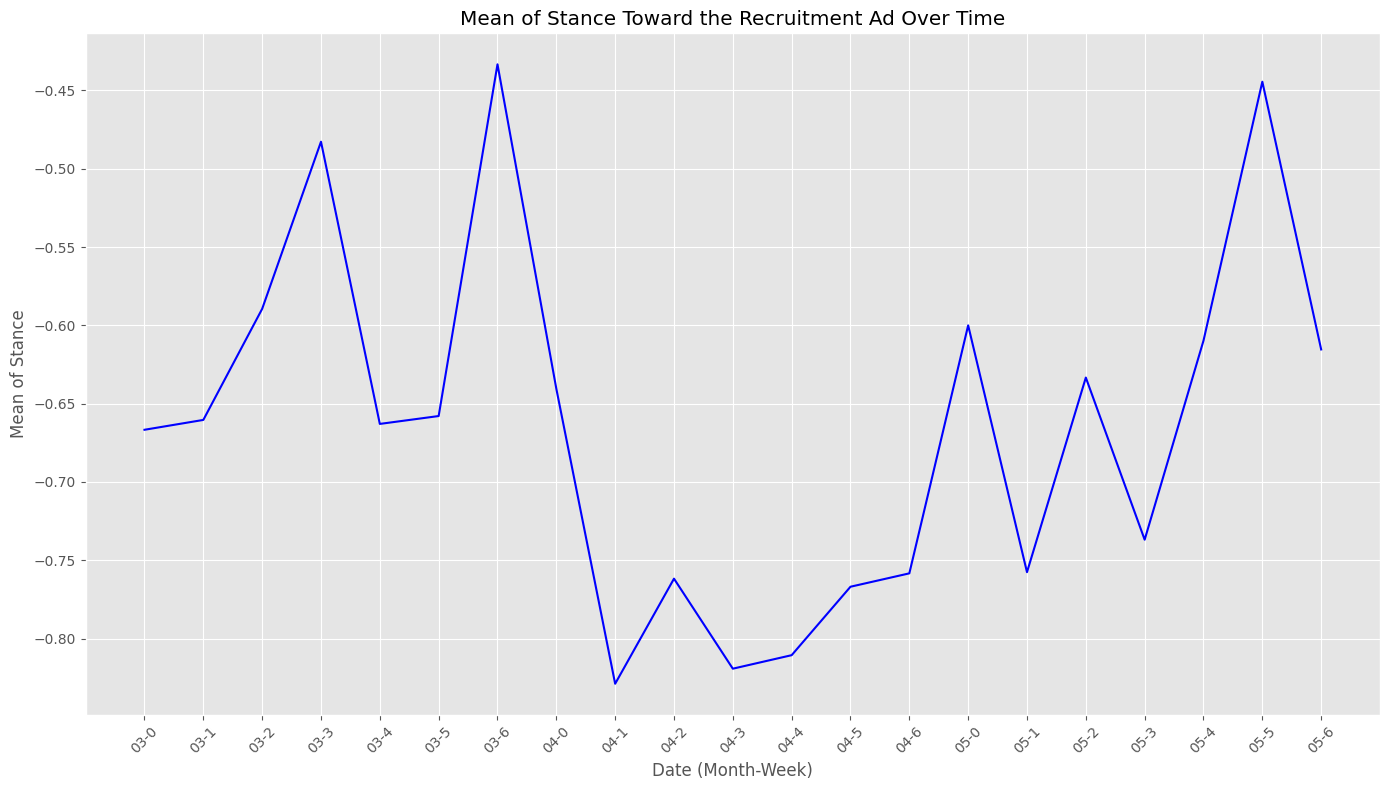

In [144]:
stance_mapping = {'FOR': 1, 'AGAINST': -1, 'NEUTRAL': 0}
comments_df['few_shot_stance_num'] = comments_df['few_shot_stance'].map(stance_mapping)

def y_label_formatter(y, pos):
    if y == 1:
        return 'For'
    elif y == -1:
        return 'Against'
    elif y == 0:
        return 'Neutral'
    else:
        return str(y)

# Step 3: Group data by 'date' and calculate mean and standard deviation
grouped_data = comments_df.groupby('week')['few_shot_stance_num'].agg(['mean', 'std'])

# Step 4: Create the time line plot with shading
plt.figure(figsize=(14, 8))
plt.plot(grouped_data.index, grouped_data['mean'], label='Mean', color='blue')
plt.xlabel('Date (Month-Week)')
plt.ylabel('Mean of Stance')
#plt.gca().yaxis.set_major_formatter(FuncFormatter(y_label_formatter))
plt.title('Mean of Stance Toward the Recruitment Ad Over Time')
#plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

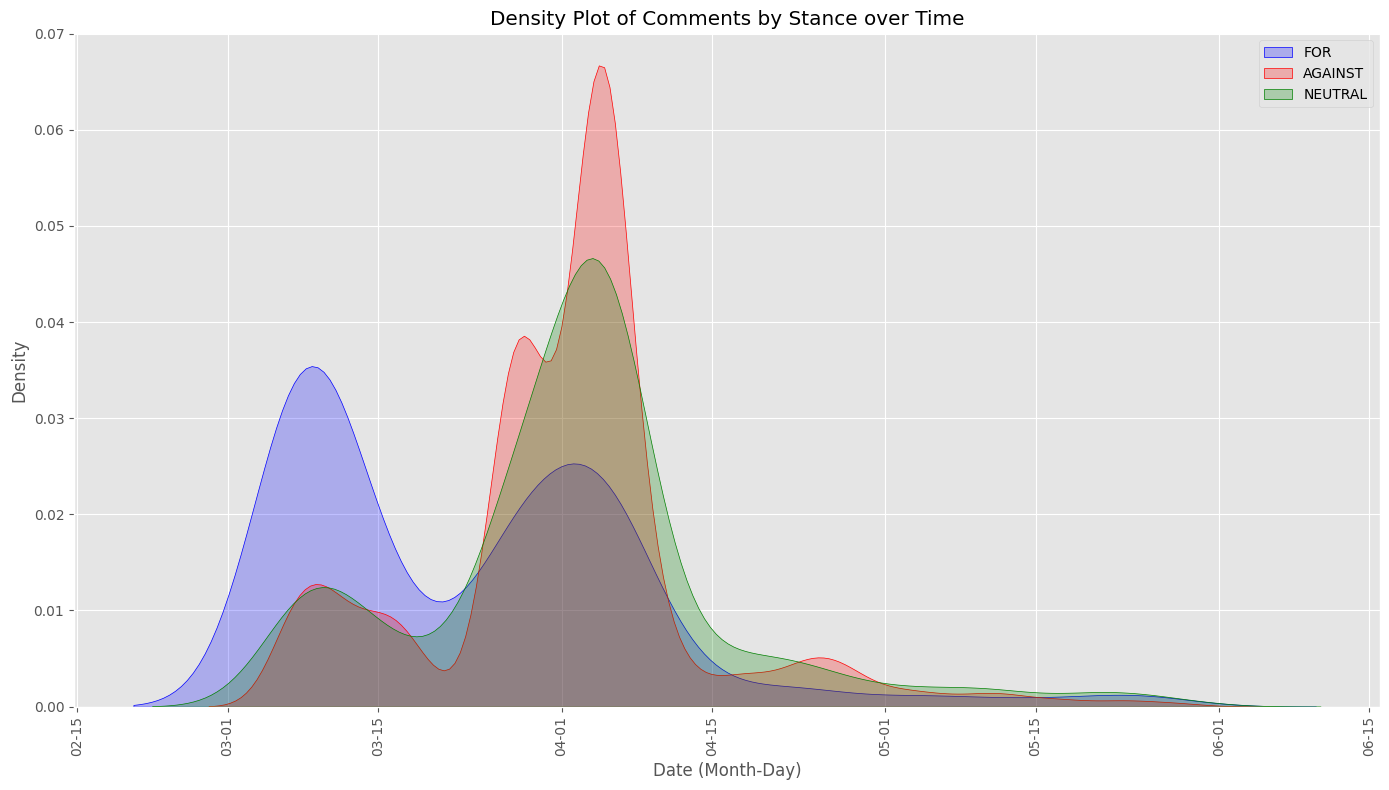

In [132]:
plt.figure(figsize=(14, 8))
ax = plt.gca()

# Plot the KDE plots for each category of 'few_shot_stance'
sns.kdeplot(data=comments_df[comments_df['few_shot_stance']=='FOR'], x='published_at', fill=True, color='blue', ax=ax, label='FOR')
sns.kdeplot(data=comments_df[comments_df['few_shot_stance']=='AGAINST'], x='published_at', fill=True, color='red', ax=ax, label='AGAINST')
sns.kdeplot(data=comments_df[comments_df['few_shot_stance']=='NEUTRAL'], x='published_at', fill=True, color='green', ax=ax, label='NEUTRAL')

# Add labels and title
plt.xlabel('Date (Month-Day)')
plt.ylabel('Density')
plt.title('Density Plot of Comments by Stance over Time')
date_format = mdates.DateFormatter('%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=90)

plt.legend()
plt.tight_layout()
plt.show()





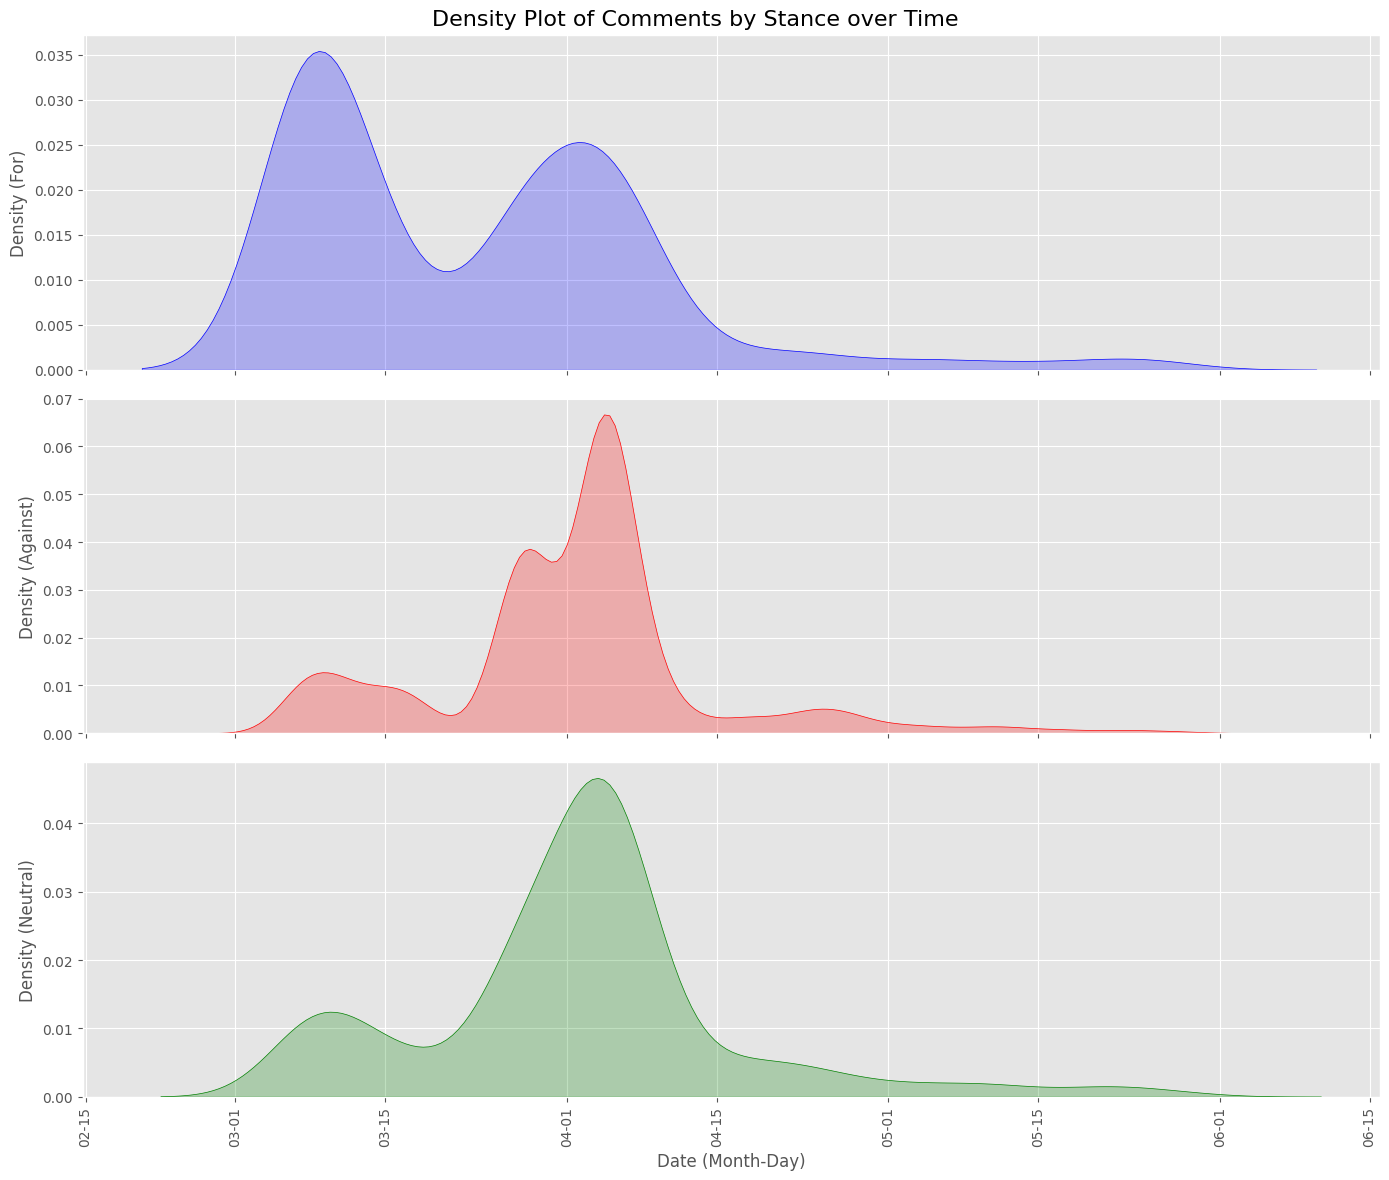

In [137]:
# Create the subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 12), sharex=True)

# Plot the KDE plots for each category of 'few_shot_stance'
sns.kdeplot(data=comments_df[comments_df['few_shot_stance']=='FOR'], x='published_at', fill=True, color='blue', ax=axes[0])
sns.kdeplot(data=comments_df[comments_df['few_shot_stance']=='AGAINST'], x='published_at', fill=True, color='red', ax=axes[1])
sns.kdeplot(data=comments_df[comments_df['few_shot_stance']=='NEUTRAL'], x='published_at', fill=True, color='green', ax=axes[2])

# Add labels and title for each subplot
date_format = mdates.DateFormatter('%m-%d')
axes[2].xaxis.set_major_formatter(date_format)
axes[2].set_xlabel('Date (Month-Day)')
axes[0].set_ylabel('Density (For)')
axes[1].set_ylabel('Density (Against)')
axes[2].set_ylabel('Density (Neutral)')

plt.suptitle('Density Plot of Comments by Stance over Time', fontsize=16)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [54]:
stance_df = pd.crosstab(comments_df['date'], comments_df['few_shot_stance'])
row_sums = stance_df.sum(axis=1)
stance_df = stance_df.div(row_sums, axis=0)

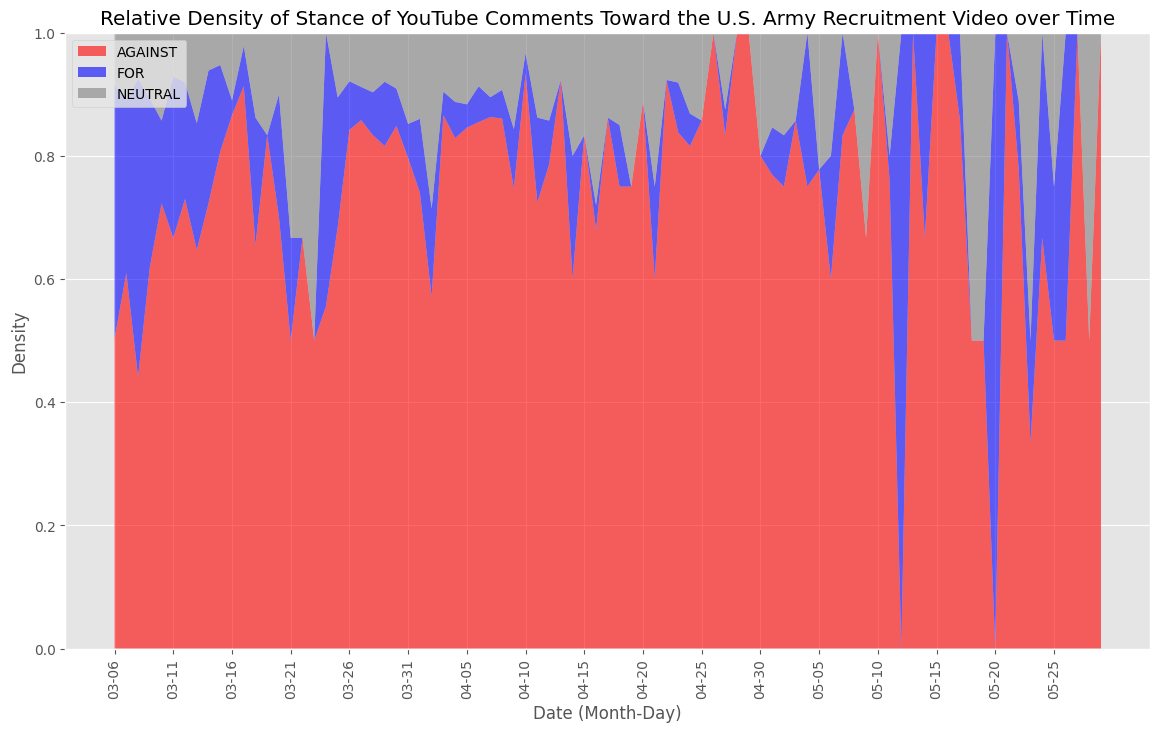

In [63]:
plt.figure(figsize=(14, 8))

plt.stackplot(stance_df.index, stance_df['AGAINST'], stance_df['FOR'], stance_df['NEUTRAL'], 
              labels=['AGAINST', 'FOR', 'NEUTRAL'], colors=["red", "blue", "gray"], alpha=0.6)
plt.legend(loc='upper left')
plt.ylim(0, 1)
plt.xlabel('Date (Month-Day)')
plt.ylabel('Density')
plt.title('Relative Density of Stance of YouTube Comments Toward the U.S. Army Recruitment Video over Time')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
every_nth = 5
plt.xticks(stance_df.index[::every_nth])
plt.show()

In [90]:
print(comments_df[comments_df['date']=='05-12']['comment'].values)

['Alot better AD than their one in 2021 AD about LGBTQIA BULLSHIT.']


In [91]:
print(comments_df[comments_df['date']=='05-20']['comment'].values)

['As a veteran you can find my opinion of this video in the dictionary between STUNNING and BRAVE']


In [151]:
comments_df[comments_df['few_shot_stance']=='AGAINST']['comment'].values

array(["What will would come out with and say about the us army having contracts in relation to pathogen weapons with the Ukraine health system. The who said Ukraine health system has been under severe pressure. Pressure meaning to cause persuasion ob or intimidation. Now I've seen the leaked army document. I'm saving it to my phone. And I've sent the document to your presidents email.",
       "We don't need anymore imbred Ukrainian soldiers going through the United states fat camp ok",
       'If you are dumb enough to join the military be sure to get in writing the vet.adm.responsibility in case of training injuries.Recruiting is way down from their negligent policys',
       ..., 'Amo demais! ❤💙💛💚', 'Lies',
       'Half of the VVD is dead\n)\nPoka sukhiy. Konyets igra.'],
      dtype=object)

In [172]:
comments_df[comments_df['few_shot_stance']=='AGAINST']['comment'].values[550]

'Be, as fat as you can be, have another do-nut in the Aaaarrrmy.'